# County-Level Economic Distress Index
> A measure of economic distress based on seven indicators.

- toc: true
- author: Nigel Soria
- categories: [census, acs, economic distress, counties]
- permalink: /distress-index/
- image: images/ks-edi.png

# Summary

The Distressed Communities Index (DCI) combines seven complementary economic indicators into a single holistic and comparative measure of community well-being. The index is constructed from the U.S. Census Bureau’s American Community Survey 5-Year Estimates and Business Patterns datasets.

The seven component metrics of the DCI are:

- No high school diploma: Percent of the 25+ population without a high school diploma or equivalent
- Housing vacancy rate: Percent of habitable housing that is unoccupied, excluding properties that are for seasonal, recreational, or occasional use
- Adults not working: Percent of the prime-age population (25-64) not currently in work
- Poverty rate: Percent of the population living under the poverty line
- Median income ratio: Median household income as a percent of the state’s median household income (to account for cost of living differences across states)
- Change in employment: Percent change in the number of jobs
- Change in establishments: Percent change in the number of business establishments 

Please click here to access the data used to create the maps below.

In [17]:
#hide

import numpy as np
import pandas as pd
import requests
import scipy.stats as ss
import matplotlib as mpl
import json
import plotly.graph_objects as go
from urllib.request import urlopen
from IPython.display import Image

In [4]:
#hide_input

df18 = pd.read_csv('data/2018-rankings.csv', dtype={'fips':'str'})
df17 = pd.read_csv('data/2017-rankings.csv', usecols=['fips', 'pct_rank'], dtype={'fips':'str'}).\
    rename(columns={'pct_rank':'2017_rank'})
df = pd.merge(df18, df17, how='left', on='fips')
df['rank_chg'] = df['pct_rank'] - df['2017_rank']

dfc = pd.read_csv('data/state-centers.csv', encoding= 'unicode_escape')
df = pd.merge(df, dfc, how='left', on='state_name')

df.to_csv('data/distress-rankings.csv', index=False)

df.head()

In [5]:
#hide

def color_scale(c1, c2, n): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    colors = []
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))

    for x in range(n+1):
        color = mpl.colors.to_hex((1-x/n)*c1 + x/n*c2)
        colors.append(color)

    return colors

ks_gold ='#F1AD02'
ks_blue ='#002569'
n=500
colors = color_scale(ks_gold, ks_blue, n)

with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)    

# Economic Distress Scores for U.S. Counties

The interactive map of U.S. counties is too large to render in this post.  Please click [here](https://sokansas-my.sharepoint.com/:u:/g/personal/nigel_soria_kdc_ks_gov/EchPaMWDRtBKiHq5A_Ws_foB5E6HSECA50vyN8pLMz8-6g?e=XM4OOc) to download an interactive version of this map.  Once you have the map open, you can zoom and drag the map with your mouse just like you would on Google Maps.

If you hover your mouse over a county, it will show you the county name and state, along with the following numbers:

- Distress Score:  These scores range from 0 to 100 and represent a percentile rank for that county.  Higher scores are bad.  For example, a score of 100 represents the most economically distressed county in the United States (i.e., with respect to the data I used).
- Distress Rank within U.S.:  This number shows how a county compares to other counties in the United States.  Unlike the distress score, lower numbers are bad, so a rank of 1 means that county is more distressed, on average, than any other county in the United States.
- Distress Rank within State:  This only considers counties within the same state.  For example, Johnson County has a rank of 105, which means it is the least distressed, on average, of the 105 counties in Kansas.

The colors on the map are based on the Distress Score, so gold = "good" and blue = "bad."  

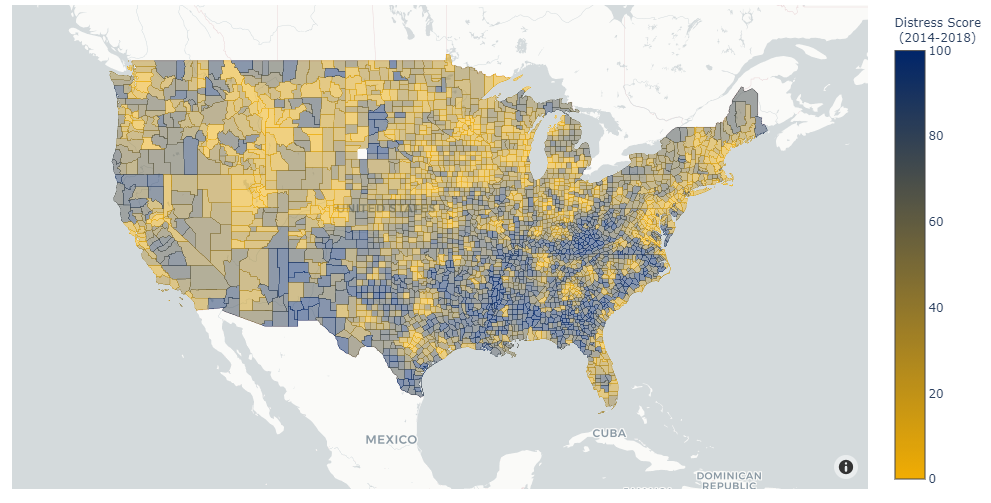

In [19]:
#hide_input
Image('figures/us-edi.png')

# Economic Distress Scores for Kansas Counties

Click [here](https://sokansas-my.sharepoint.com/:u:/g/personal/nigel_soria_kdc_ks_gov/ES4p8jzZ7ZlChSPZCuSSjSgB2Bo4DnXQJ5BP3674DIqkwQ?e=QfZKHU) to download an interactive map of Kansas.

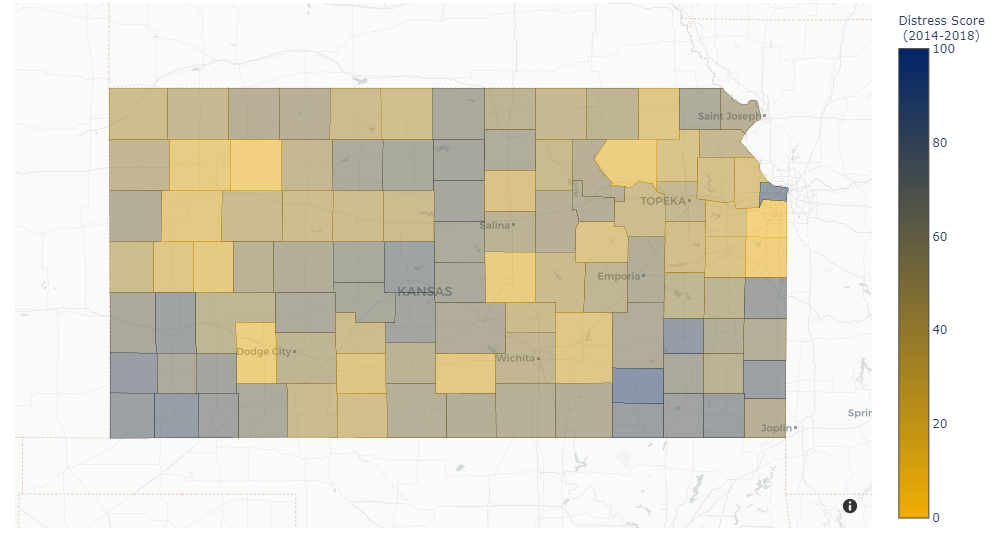

In [23]:
#hide_input
Image('figures/ks-edi.png')

# Methodology

Each component is weighted equally in the index, which itself is calculated by ranking communities on each of the seven metrics, taking the average of those ranks, and then normalizing the average to be equivalent to a percentile. Distress scores range from approaching zero to 100.0, such that the zip code with the average rank of 12,500 out of 25,000 will register a distress score of 50.0. Communities are then grouped into quintiles, or fifths. The best-performing quintile is considered “prosperous,” the second-best “comfortable,” the third “mid-tier,” the fourth “at risk,” and the fifth, or worst-performing, “distressed.”

The main difference is the unemployment measure.

**Source notes:**

This year’s DCI presents results for two time periods reflecting the composition and availability of the Census Bureau’s ACS 5-Year Estimates: 2007-2011 and 2012-2016. The 5-year estimates are constructed from five years’ worth of data collection, reflecting the length of time required to compile enough data to provide meaningful and accurate estimates at fine geographic scales (such as zip codes). The 2007-2011 5-year estimates represent the first installment available at the zip code level, and the 2012-2016 5-year estimates are the most recent. Business Patterns data are available annually, and we have naturally chosen to include and analyze the years that match the ends of each ACS window.

This year’s materials, report, and data interactive present the results from the DCI calculated for each time period, with the discussion defaulting to the more recent period where not specified. The two universes of zip codes are not completely identical, as just over 500 zip codes appear in the latter dataset but not the former and just over 700 zip codes the former but not the latter. These zip codes were included in the DCI calculated for their respective periods but excluded from any section of the analysis that directly compares zip codes over time. The discrepancies in coverage can be attributed to the rare formation of new zip codes and to zip codes falling below the 500-person threshold necessary to be included in either period (the threshold excludes institutionalized residents, students, and active duty personnel in order to prevent the results from being artificially biased by prisons, colleges and universities, and military bases).

**Data notes:**

In instances where employment estimates from Business Patterns were suppressed by the Census Bureau in order to preserve privacy, the DCI defaulted to the next-highest level geography to produce a growth estimate that could enter into the index. This affected nearly 4,000 zip codes in the 2012-2016 DCI and 36 counties. For example, the statewide job growth rate of 4.7 percent entered into the index as the job growth rate for the three North Dakota counties for which employment figures were suppressed.